In [209]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
std_seed=0
%matplotlib inline

In [210]:
data = pd.read_csv('Healthcare.csv')
data.head()

,Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x58,x59,x60,x61,x62,x63,x64,x65,x66,y
0,1.0,27.0,1.0,1.0,1.0,A,18.0,3.0,1.0,28.0,...,1.0,0.0,0.0,0.0,0.0,1.0,Mp,NPT,1.0,-1
1,2.0,30.0,0.0,1.0,1.0,B,18.0,13.0,3.0,19.0,...,1.0,0.0,0.0,0.0,0.0,0.0,Mm,NST,1.0,-1
2,3.0,37.0,0.0,1.0,1.0,A,1.0,3.0,14.0,33.0,...,1.0,0.0,0.0,0.0,0.0,0.0,Mp,NPT,0.0,1
3,4.0,29.0,0.0,1.0,1.0,C,14.0,9.0,3.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Mp,NST,0.0,-1
4,5.0,33.0,1.0,1.0,0.0,E,2.0,15.0,12.0,39.0,...,1.0,0.0,0.0,0.0,0.0,0.0,Mm,NST,1.0,-1


In [211]:
data.shape
#Observations = 2501 
#Columns = 68 (features-66, target-1)

(2501, 68)

In [212]:
# CHecking for null values
data.isnull().any()

Row     True
x1      True
x2      True
x3      True
x4      True
x5      True
x6      True
x7      True
x8      True
x9      True
x10     True
x11     True
x12     True
x13     True
x14     True
x15     True
x16     True
x17     True
x18     True
x19     True
x20     True
x21     True
x22     True
x23     True
x24     True
x25     True
x26     True
x27     True
x28     True
x29     True
       ...  
x38     True
x39     True
x40     True
x41     True
x42     True
x43     True
x44     True
x45     True
x46     True
x47     True
x48     True
x49     True
x50     True
x51     True
x52     True
x53     True
x54     True
x55     True
x56     True
x57     True
x58     True
x59     True
x60     True
x61     True
x62     True
x63     True
x64     True
x65     True
x66     True
y      False
dtype: bool

### Preprocessing

In [213]:
#Removing null values
data = data.dropna(how='any',axis=0)

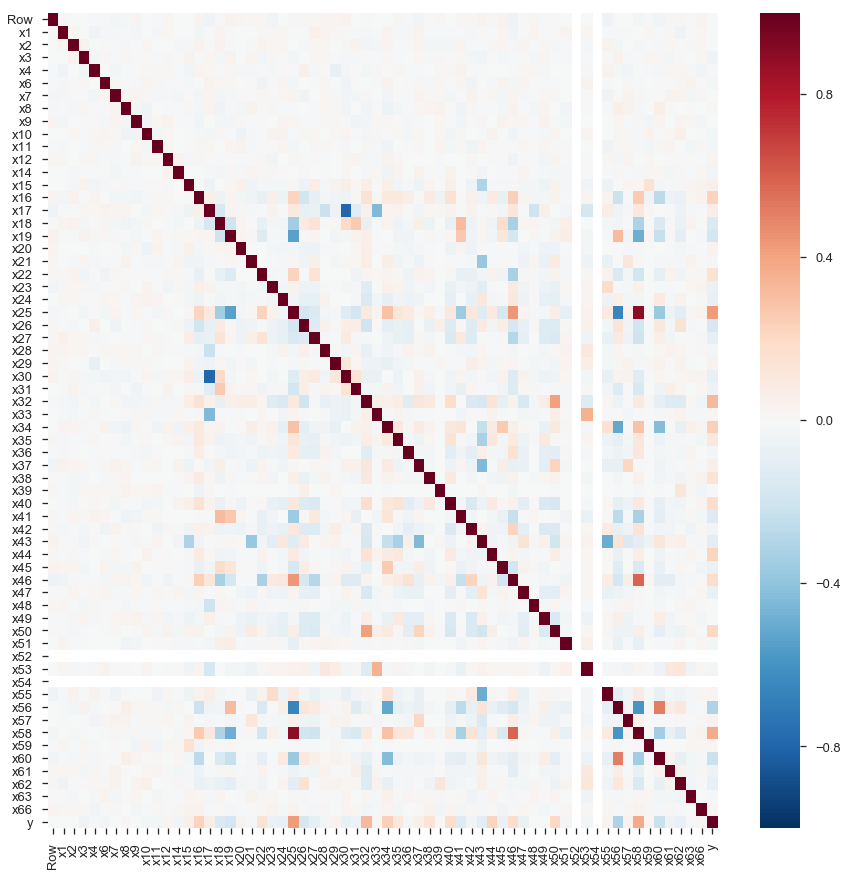

In [214]:
#Plotting heatmap to gauge multicollinearity in dataset
fig = plt.subplots(figsize=(15,15)) 
sns.heatmap(data.corr())

#### Upon observation we find sparse multicollinearity that can be ignored 

In [215]:
#Encoding categorical features
cat_cols = [col for col in data.columns 
           if data[col].dtype=='object']
ord_cols = [col for col in data.columns
           if data[col].dtype in('float64','int64')]
dum_data = pd.get_dummies(data[cat_cols],drop_first='True')
dat = pd.concat([data[ord_cols],dum_data],axis=1)
dat.head()

,Row,x1,x2,x3,x4,x6,x7,x8,x9,x10,...,x5_D,x5_E,x13_beta,x13_chi,x64_Mk,x64_Mm,x64_Mp,x65_NST,x65_PT,x65_ST
0,1.0,27.0,1.0,1.0,1.0,18.0,3.0,1.0,28.0,119.9,...,0,0,1,0,0,0,1,0,0,0
1,2.0,30.0,0.0,1.0,1.0,18.0,13.0,3.0,19.0,86.7,...,0,0,0,1,0,1,0,1,0,0
2,3.0,37.0,0.0,1.0,1.0,1.0,3.0,14.0,33.0,174.0,...,0,0,1,0,0,0,1,0,0,0
3,4.0,29.0,0.0,1.0,1.0,14.0,9.0,3.0,29.0,8.8,...,0,0,0,1,0,0,1,1,0,0
4,5.0,33.0,1.0,1.0,0.0,2.0,15.0,12.0,39.0,55.0,...,0,1,1,0,0,1,0,1,0,0


In [216]:
#Splitting the columns into predictors and target
x = dat.iloc[:,1:-1]
x.drop(['y'],axis=1,inplace=True)
y = dat['y']

In [217]:
#Performing the train test split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=std_seed)

In [218]:
#Imbalance in values of target
y_train.value_counts()

-1    1323
 1     427
Name: y, dtype: int64

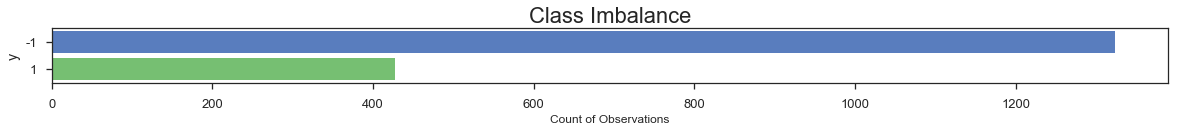

In [219]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y=y_train)
plt.title("Class Imbalance", fontsize = 22)
plt.xlabel('Count of Observations',fontsize = 12)
plt.style.use("seaborn-muted")

In [220]:
train_data = pd.concat([X_train,y_train],axis=1)

### Upsampling the minority class of the training data to use in model building if model is influenced by the skew in class imbalance to produce disproportionate error rates for the different classes

In [221]:
majority_class = train_data[train_data['y']==-1]
minority_class = train_data[train_data['y']==1]

In [222]:
from sklearn.utils import resample
upsampled_minority = resample(minority_class,replace=True,n_samples=1323,random_state=std_seed)
data_upsampled = pd.concat([majority_class,upsampled_minority],axis=0)
#The minority class is upsampled with replacement to obtain an equal number of observations as the majority class

In [223]:
data_upsampled['y'].value_counts()

 1    1323
-1    1323
Name: y, dtype: int64

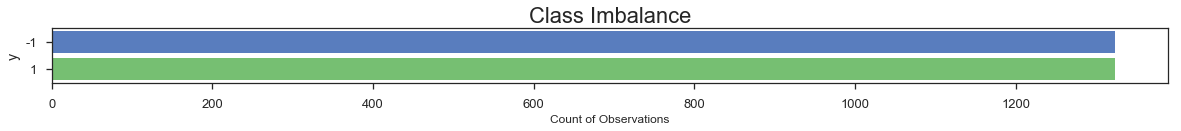

In [224]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-talk')
sns.countplot(y="y", data=data_upsampled)
plt.title("Class Imbalance", fontsize = 22)
plt.xlabel('Count of Observations',fontsize = 12)
plt.style.use("seaborn-muted")

In [225]:
y = data_upsampled['y']
y.head()

1988   -1
1969   -1
1368   -1
840    -1
2488   -1
Name: y, dtype: int64

In [226]:
x = data_upsampled
x.drop(['y'],axis=1,inplace=True)

In [227]:
y=y.reset_index(drop='True')
x=x.reset_index(drop='True')
x.head()

,x1,x2,x3,x4,x6,x7,x8,x9,x10,x11,...,x5_C,x5_D,x5_E,x13_beta,x13_chi,x64_Mk,x64_Mm,x64_Mp,x65_NST,x65_PT
0,28.0,1.0,0.0,1.0,7.0,5.0,7.0,25.0,196.5,76.2,...,0,0,0,1,0,0,0,1,0,0
1,35.0,1.0,1.0,1.0,1.0,5.0,16.0,35.0,4.5,48.1,...,0,0,1,0,0,0,0,1,1,0
2,31.0,1.0,1.0,1.0,4.0,12.0,2.0,27.0,116.7,134.4,...,0,1,0,0,0,0,1,0,0,1
3,24.0,1.0,1.0,1.0,6.0,10.0,12.0,37.0,79.2,34.9,...,0,0,0,1,0,0,0,1,0,0
4,25.0,0.0,0.0,1.0,4.0,18.0,9.0,32.0,5.8,88.4,...,0,0,0,1,0,0,0,1,0,0


In [228]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
actuals=[]
acc=[]
proba=[]
std_dev=[]
predicted=[]
class1_acc=[]
class2_acc=[]

In [229]:
classifiers=['Naive Bayes','Radial Svm','Logistic Regression','Decision Tree','KNN','Random Forest']

### Gaussian Naive Bayes

In [230]:
model = GaussianNB()
model.fit(x,y)
y_pred = model.predict(X_test)
conf = confusion_matrix(y_test,y_pred)
g=conf.diagonal()/conf.sum(axis=1)
acc.append(metrics.accuracy_score(y_test,y_pred))
class1_acc.append(g[0])
class2_acc.append(g[1])
std_dev.append(y_pred.std())

### Radial SVM

In [231]:
model = svm.SVC(kernel='rbf')
model.fit(x,y)
y_pred = model.predict(X_test)
conf = confusion_matrix(y_test,y_pred)
g=conf.diagonal()/conf.sum(axis=1)
acc.append(metrics.accuracy_score(y_test,y_pred))
class1_acc.append(g[0])
class2_acc.append(g[1])
std_dev.append(y_pred.std())

In [232]:
print(acc,class1_acc,class2_acc,std_dev)

[0.7466666666666667, 0.7573333333333333] [0.70598591549295775, 1.0] [0.87362637362637363, 0.0] [0.99142635743771834, 0.0]


### Logistic Regression

In [233]:
model = LogisticRegression()
model.fit(x,y)
y_pred = model.predict(X_test)
conf = confusion_matrix(y_test,y_pred)
g=conf.diagonal()/conf.sum(axis=1)
acc.append(metrics.accuracy_score(y_test,y_pred))
class1_acc.append(g[0])
class2_acc.append(g[1])
std_dev.append(y_pred.std())

In [234]:
print(acc,class1_acc,class2_acc,std_dev)

[0.7466666666666667, 0.7573333333333333, 0.79066666666666663] [0.70598591549295775, 1.0, 0.77992957746478875] [0.87362637362637363, 0.0, 0.82417582417582413] [0.99142635743771834, 0.0, 0.96378881965339747]


### Decision Trees

In [235]:
model = DecisionTreeClassifier()
model.fit(x,y)
y_pred = model.predict(X_test)
conf = confusion_matrix(y_test,y_pred)
g=conf.diagonal()/conf.sum(axis=1)
acc.append(metrics.accuracy_score(y_test,y_pred))
class1_acc.append(g[0])
class2_acc.append(g[1])
std_dev.append(y_pred.std())

### KNN

In [236]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(x,y)
y_pred = model.predict(X_test)
conf = confusion_matrix(y_test,y_pred)
g=conf.diagonal()/conf.sum(axis=1)
acc.append(metrics.accuracy_score(y_test,y_pred))
class1_acc.append(g[0])
class2_acc.append(g[1])
std_dev.append(y_pred.std())

### Random Forest

In [237]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x,y)
y_pred = model.predict(X_test)
conf = confusion_matrix(y_test,y_pred)
g=conf.diagonal()/conf.sum(axis=1)
acc.append(metrics.accuracy_score(y_test,y_pred))
class1_acc.append(g[0])
class2_acc.append(g[1])
std_dev.append(y_pred.std())

In [238]:
len(std_dev)

6

In [239]:
comparison = pd.DataFrame({'Overall Accuracy':acc,'Class1_Accuracy':class1_acc,'Class2_Accuracy':class2_acc,
                           'Model Variance':std_dev},index = classifiers)

In [240]:
print(comparison)

                     Class1_Accuracy  Class2_Accuracy  Model Variance  \
Naive Bayes                 0.705986         0.873626        0.991426   
Radial Svm                  1.000000         0.000000        0.000000   
Logistic Regression         0.779930         0.824176        0.963789   
Decision Tree               0.834507         0.571429        0.881599   
KNN                         0.716549         0.686813        0.971428   
Random Forest               0.915493         0.565934        0.801993   

                     Overall Accuracy  
Naive Bayes                  0.746667  
Radial Svm                   0.757333  
Logistic Regression          0.790667  
Decision Tree                0.770667  
KNN                          0.709333  
Random Forest                0.830667  


### Parameter tuning for SVM

In [42]:
from sklearn.model_selection import GridSearchCV
Cs = [0.001,0.01,0.1,1,10, 100]
gammas = [0.001,0.01,0.1,1]
param_grid = {'C':Cs,'gamma':gammas}
grid = GridSearchCV(svm.SVC(kernel='rbf'),param_grid,refit=True)

In [38]:
grid.fit(x,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [39]:
grid.best_params_

{'C': 1, 'gamma': 0.01}

In [40]:
pred = grid.predict(X_test)

In [41]:
print(metrics.accuracy_score(y_test,pred))

0.757333333333


In [42]:
conf=confusion_matrix(y_test,pred)
con = 
print(conf)

[[568   0]
 [182   0]]


In [51]:
g = conf.diagonal()
print(g)

[571 508]


In [52]:
print(g/conf.sum(axis=1))

[ 1.          0.90070922]


### Parameter tuning for Random Forest

In [190]:
param_grid = {
    'min_samples_split' : [2,3,8],
    'min_samples_leaf' : [3,4,5],
    'max_features' : ['auto','sqrt'],
    'n_estimators' : [100, 200, 300, 1000],
    'max_depth' : [2,3,5]}

In [191]:
grid_2 = GridSearchCV(RandomForestClassifier(n_estimators=100),param_grid,refit=True)

In [192]:
grid_2.fit(x,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 8], 'min_samples_leaf': [3, 4, 5], 'max_features': ['auto', 'sqrt'], 'n_estimators': [100, 200, 300, 1000], 'max_depth': [2, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [200]:
pred = grid_2.predict(X_test)
print('Overall Prediction Accuracy: ',metrics.accuracy_score(y_test,pred))
conf=confusion_matrix(y_test,pred)
g = conf.diagonal()
print('Confusion Matrix')
con = pd.DataFrame(data=conf, index = ['actual -1:','actual 1'], columns = ['predicted -1','predicted 1'])
print(con)
print('Class Prediction Accuracies:', g/conf.sum(axis=1))

Overall Prediction Accuracy:  0.752
Confusion Matrix
            predicted -1  predicted 1
actual -1:           450          118
actual 1              32          150
Class Prediction Accuracies: [ 0.79225352  0.82417582]


### Parameter tuning for Logistic Regression

In [206]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1','l2'],'tol':[0.01,0.0001,0.00001,0.000001]}

In [207]:
grid_2 = GridSearchCV(LogisticRegression(class_weight='balanced'),param_grid,refit=True)

In [208]:
grid_2.fit(x,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'tol': [0.01, 0.0001, 1e-05, 1e-06]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [205]:
pred = grid_2.predict(X_test)
print('Overall Prediction Accuracy: ',metrics.accuracy_score(y_test,pred))
g = conf.diagonal()
print('Confusion Matrix')
conf=confusion_matrix(y_test,pred)
con = pd.DataFrame(data=conf, index = ['actual -1:','actual 1'], columns = ['predicted -1','predicted 1'])
print(con)
print('Class Prediction Accuracies:', g/conf.sum(axis=1))

Overall Prediction Accuracy:  0.798666666667
Confusion Matrix
            predicted -1  predicted 1
actual -1:           449          119
actual 1              32          150
Class Prediction Accuracies: [ 0.79225352  0.82417582]


In [48]:
y_pred=grid_2.predict(X_test)

In [49]:
print(metrics.accuracy_score(y_test,y_pred))

0.798666666667


In [50]:
conf = confusion_matrix(y_test,y_pred)
g=conf.diagonal()/conf.sum(axis=1)
Class1_error = 1-g[0]
Class2_error = 1-g[1]

In [53]:
print('Confusion Matrix:')
print(conf)

Confusion Matrix:
[[449 119]
 [ 32 150]]


In [52]:
print('Class_1 Error : %f, Class_2 Error : %f' %(Class1_error,Class2_error))

Class_1 Error : 0.209507, Class_2 Error : 0.175824


In [54]:
grid_2.best_params_

{'C': 10, 'penalty': 'l1', 'tol': 0.0001}

### Manually fine tuning the model

In [55]:
C=[10,20,30,40,50,60]

In [56]:
for i in C:
    mod=LogisticRegression(class_weight='balanced',penalty='l1',tol=0.0001,C=i)
    mod.fit(x,y)
    y_pred = mod.predict(X_test)
    acc = metrics.accuracy_score(y_test,y_pred)
    print('Accuracy for C=%f : %f' %(i,acc))

Accuracy for C=10.000000 : 0.798667
Accuracy for C=20.000000 : 0.800000
Accuracy for C=30.000000 : 0.800000
Accuracy for C=40.000000 : 0.798667
Accuracy for C=50.000000 : 0.798667
Accuracy for C=60.000000 : 0.798667


In [67]:
model = LogisticRegression(class_weight='balanced',penalty='l1',tol=0.0001,C=30)

In [68]:
from sklearn.metrics import roc_auc_score
model.fit(x,y)
y_pred=model.predict(X_test)
acc=metrics.accuracy_score(y_test,y_pred)
conf = confusion_matrix(y_test,y_pred)
g=conf.diagonal()/conf.sum(axis=1)
Class1_error = 1-g[0]
Class2_error = 1-g[1]
auc_score = roc_auc_score(y_test,y_pred) 

In [69]:
print('Model Accuracy: %f'%(acc))
print('AUC: %f'%(auc_score))
print('Class_1 Error: %f'%(Class1_error))
print('Class_2 Error: %f'%(Class2_error))

Model Accuracy: 0.800000
AUC: 0.808215
Class_1 Error: 0.207746
Class_2 Error: 0.175824


### Using the entire dataset to build the final model

In [241]:
data.head()
data = data.dropna(how='any',axis=0)

In [242]:
data.head()
cat_cols = [col for col in data.columns 
           if data[col].dtype=='object']
ord_cols = [col for col in data.columns
           if data[col].dtype in('float64','int64')]
dum_data = pd.get_dummies(data[cat_cols],drop_first='True')
dat = pd.concat([data[ord_cols],dum_data],axis=1)
majority_class = dat[dat['y']==-1]
minority_class = dat[dat['y']==1]
upsampled_minority = resample(minority_class,replace=True,n_samples=1891,random_state=std_seed)
data_upsampled = pd.concat([majority_class,upsampled_minority],axis=0)

In [243]:
data_upsampled['y'].value_counts()

 1    1891
-1    1891
Name: y, dtype: int64

In [244]:
y = data_upsampled['y']
y.head()

0   -1
1   -1
3   -1
4   -1
7   -1
Name: y, dtype: int64

In [245]:
x = data_upsampled
x.drop(['y'],axis=1,inplace=True)

In [246]:
y=y.reset_index(drop='True')
x=x.reset_index(drop='True')
x.drop(['Row'],axis=1,inplace=True)

In [247]:
x.shape

(3782, 74)

In [248]:
y.shape

(3782,)

In [249]:
param_grid = {'C': [20, 30, 100, 1000], 'penalty': ['l1','l2'],'tol':[0.01,0.0001,0.00001,0.000001]}

In [250]:
grid_2 = GridSearchCV(LogisticRegression(class_weight='balanced'),param_grid,refit=True)

In [ ]:
final_model = grid_2.fit(x,y)

In [ ]:
grid_2.best_params_

### Fitting the testing data

In [139]:
test_data = pd.read_csv('test.csv')

In [140]:
test_data.head()

,Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x58,x59,x60,x61,x62,x63,x64,x65,x66,y
0,1,30,1,1,0,A,16,5,2,28,...,1,0,0,0,0,1,Mp,NPT,1,NaN
1,2,41,0,1,1,C,8,3,9,34,...,1,0,0,0,0,0,Ma,PT,1,NaN
2,3,24,0,1,0,E,5,1,6,27,...,0,0,0,0,0,1,Mp,ST,1,NaN
3,4,36,1,1,0,A,17,11,8,35,...,1,0,0,0,0,0,Mp,NPT,1,NaN
4,5,19,0,1,1,C,1,0,14,27,...,1,0,0,0,0,1,Ma,PT,1,NaN


In [141]:
test_data.drop(['Row','y'],axis=1,inplace=True)

In [142]:
test_data.head()
test_data.shape

(1647, 66)

In [83]:
test_data.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
      ..
x37    0
x38    0
x39    0
x40    0
x41    0
x42    0
x43    0
x44    0
x45    0
x46    0
x47    0
x48    0
x49    0
x50    0
x51    0
x52    0
x53    0
x54    0
x55    0
x56    0
x57    0
x58    0
x59    0
x60    0
x61    0
x62    0
x63    0
x64    0
x65    0
x66    0
dtype: int64

In [143]:
cat_cols = [col for col in test_data.columns 
           if test_data[col].dtype=='object']
ord_cols = [col for col in test_data.columns
           if test_data[col].dtype in('float64','int64')]
dum_data = pd.get_dummies(test_data[cat_cols],drop_first='True')
dat = pd.concat([test_data[ord_cols],dum_data],axis=1)
dat.head()

,x1,x2,x3,x4,x6,x7,x8,x9,x10,x11,...,x62,x63,x66,x5_C,x5_E,x13_beta,x13_chi,x64_Mp,x65_PT,x65_ST
0,30,1,1,0,16,5,2,28,148.1,59.4,...,0,1,1,0,0,1,0,1,0,0
1,41,0,1,1,8,3,9,34,143.4,162.1,...,0,0,1,1,0,0,0,0,1,0
2,24,0,1,0,5,1,6,27,199.2,10.7,...,0,1,1,0,1,0,1,1,0,1
3,36,1,1,0,17,11,8,35,99.4,85.5,...,0,0,1,0,0,1,0,1,0,0
4,19,0,1,1,1,0,14,27,104.0,10.5,...,0,1,1,1,0,0,0,0,1,0


In [144]:
test_col = (dat.columns).tolist()
train_col = (x.columns).tolist()

In [150]:
len(train_col)

74

In [151]:
len(test_col)

69

In [152]:
diff=set(train_col)-set(test_col)
print(diff)

{'x5_D', 'x64_Mm', 'x5_B', 'x64_Mk', 'x65_NST'}


In [153]:
missing_cols=list(diff)

In [154]:
for i in missing_cols:
    dat[i]=0

In [155]:
dat.shape

(1647, 74)

In [156]:
test_col = (dat.columns).tolist()
train_col = (x.columns).tolist()
diff=set(train_col)-set(test_col)
print(diff)

set()


In [160]:
prediction = final_model.predict(dat)

In [162]:
pred = pd.DataFrame(data=prediction)

In [164]:
pred[0].value_counts()

-1    891
 1    756
Name: 0, dtype: int64

In [165]:
pred.to_csv('BMI555IEE520_Results2018_SidharthChandrasekaran.csv')